# Assignment Monte Carlo in Medical Physics
## Buffon needle - SERIE 2
**Assignment 1)**
Drop randomly needles of length l on a bar grid with distance d between the bars.
What is the probability that a needle hits a bar?
Perform Monte Carlo simulation of this problem and determine $\pi$ for different initial
numbers of needles. Repeat the simulation several times and compare the results as
function of the number of needles dropped.
(Plotting the random drop of the needles is helpful for checking the result.)

/home/matteo/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


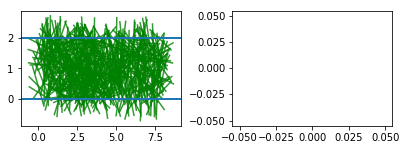

In [58]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import collections  as mc

def GetCenter(L, d):
    center = np.random.rand(2)
    center[0] *= L
    center[1] *= d
    return center

def GetTheta():
    return np.pi*np.random.rand(1)

def PlotNeedle(center, theta, l):
    plt.axhline(y=0, xmin=0, xmax=L)
    plt.axhline(y=d, xmin=0, xmax=L)
    x = np.linspace(center[0] - np.cos(theta)*l/2, center[0] + np.cos(theta)*l/2, 100)
    x_0 = center[0]*np.ones(len(x))
    plt.plot(x, center[1] + np.tan(theta)*(x - x_0), color='green', alpha=0.8, linestyle='-')
    return 0

def Hit(center, theta, l):
    if center[1] < 0.5*l*abs(np.sin(theta)):
        return True
    else:
        return False

np.random.seed(1314)
N = 500
L = 8; d = 2; l = 1.5
counts = 0
step = 20
pi = np.array([])
for i in range(N):
    center = GetCenter(L, d)
    theta = GetTheta()
    if Hit(center, theta, l):
        counts += 1
    plt.subplot(1,2,1)
    PlotNeedle(center, theta, l)
    if i%step == 0 & i > 0:
        pi_x = float(N/counts)*float(2*l/d)
        pi = np.append(pi, pi_x)

x = np.linspace(step, N, len(pi))
plt.subplot(1,2,2)
plt.plot(x, pi, color='red', linestyle='-')

plt.tight_layout()
plt.subplots_adjust(bottom=0.5, top=0.9)
plt.show()
